<a href="https://colab.research.google.com/github/Juramidam/Projetos-de-Data-Science/blob/main/EDL_AIRBNB_cidade_de_Salem_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="30%" src="https://raw.githubusercontent.com/Juramidam/Projetos-de-Data-Science/227b98382494091864bd4566fe8038d947555b5d/logo%20invertido%20Dan.png">


#### **Projeto 001-Portifólio *Da`N`*ta Science**


---

# Análise exploratória dos Dados do Airbnb - *Salem-EUA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa  do setor hoteleiro**. Mesmo **não possuindo nenhum hotel, nem imóvel** em seus ativos permanentes!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora de hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Salem, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
salem = pd.read_csv("http://data.insideairbnb.com/united-states/or/salem-or/2021-03-19/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Código para identificar o imóvel
* `name` - Nome do imóvel
* `host_id` - Código para identificar dono/anfitrião do imóvel
* `host_name` - Nome do dono do imóvel
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro que está o imóvel
* `latitude` - Coordenada da latitude do imóvel
* `longitude` - Coordenada da longitude do imóvel
* `room_type` - O tipo de quarto que está disponível
* `price` - Preço para alugar o imóvel por diária
* `minimum_nights` - Quantidade mínima de noites aceitas para reserva
* `number_of_reviews` - Número de reviews que o imóvel possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo dono
* `availability_365` - Número de dias que houve vacância

Antes de iniciar qualquer análise, vamos olhar o nosso *dataset*, analisando as 7 primeiras entradas.


In [ ]:
#Olhar as sete primeiras entradas para analisar os dados contidos no dataset
salem.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1159564,SOLAR ECLIPSE - A,2185672,Roberta,NaN,Ward 3,44.88416,-123.04341,Private room,175,2,2,2013-08-30,0.02,1,365
1,4394073,Warm and Welcoming in Downtown.,22810342,Michael,NaN,Ward 1,44.94813,-123.02229,Private room,47,2,107,2020-11-27,1.38,2,230
2,4785215,Century House Doug Fir Room,10502090,Jean,NaN,Ward 2,44.93448,-123.02103,Private room,89,2,87,2021-03-06,1.15,3,355
3,7293821,Chauffeurs Room @ the Villa,38202007,Julie,NaN,Ward 7,44.92484,-123.04990,Entire home/apt,98,1,336,2021-02-09,4.87,1,0
4,8255984,Downtown Salem Loft in Salem Oregon,43537767,Angela,NaN,Ward 1,44.94190,-123.03976,Entire home/apt,179,2,68,2021-03-13,1.02,8,334
5,8524259,Single room in Comfort Home,2421461,Nancy,NaN,Ward 7,44.89105,-123.06843,Private room,65,1,2,2018-06-13,0.05,1,364
6,8698684,Charming 1925 Craftsman centrally located!,3208932,Christy And Arnaud,NaN,Ward 2,44.93305,-123.01985,Entire home/apt,200,2,80,2020-07-19,1.26,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 168 entradas e 106 variáveis (`listings.csv.gz`).

In [ ]:
#Verificar a quantidade de entradas e variáveis
print(" Entradas:\t {}\n Variáveis:\t {} \n".format(salem.shape[0],salem.shape[1]))

display(salem.dtypes)

 Entradas:	 168
 Variáveis:	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em pouco mais de 20.83% das linhas, referem-se a casas que possivelmente não tiveram nenhuma avaliação.
* A variável `host_name` têm aproximadamente 0,02% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(salem.isnull().sum()/ salem.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.208333
last_review                       0.208333
host_name                         0.017857
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

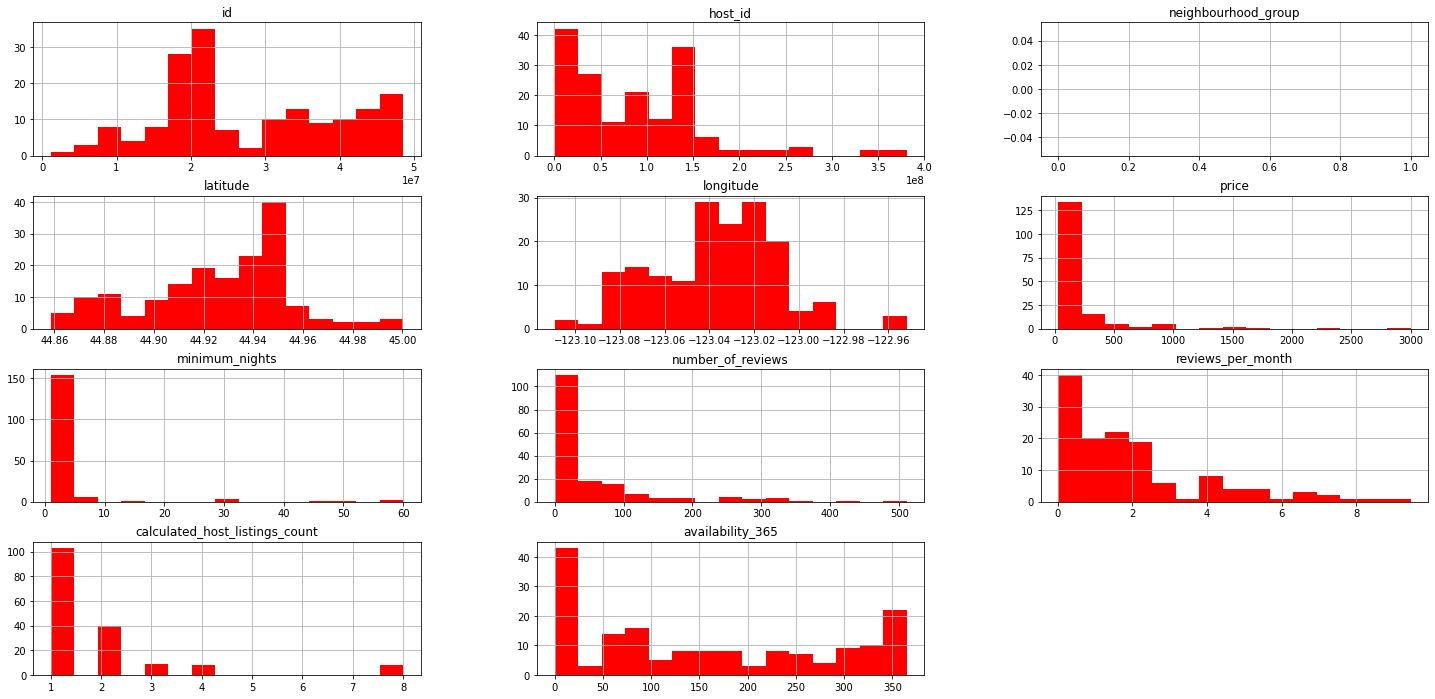

In [ ]:
# plotar o histograma das variáveis numéricas
salem.hist(bins=15, color="red", figsize=(25,12));

### **Q4. Há outliers presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para a variável.

In [ ]:
# ver a média da coluna `price``
salem[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,168.000000,168.000000,168.000000,133.000000,168.000000,168.000000
mean,232.345238,3.672619,51.226190,1.954286,1.821429,154.327381
std,391.408266,8.852414,87.970647,2.023471,1.598358,130.730444
min,30.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.370000,1.000000,18.250000
50%,114.500000,2.000000,12.000000,1.400000,1.000000,134.500000
75%,175.000000,2.000000,62.250000,2.490000,2.000000,276.500000
max,3000.000000,60.000000,511.000000,9.450000,8.000000,365.000000


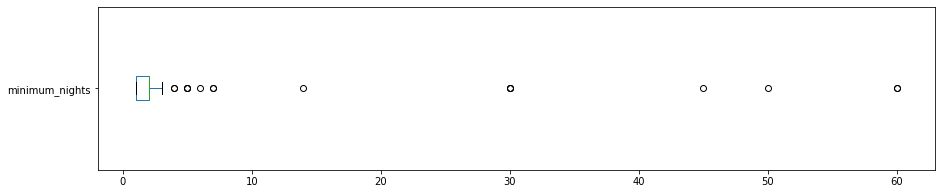

minimum_nights: valores acima de 10:
16 entradas
Correspondem a 9.5238% do total


In [ ]:
# minimum_nights
salem.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 10 dias para minimum_nights
print("minimum_nights: valores acima de 10:")
print("{} entradas".format(len(salem[salem.minimum_nights > 3])))
print("Correspondem a {:.4f}% do total".format((len(salem[salem.minimum_nights > 3]) / salem.shape[0])*100))

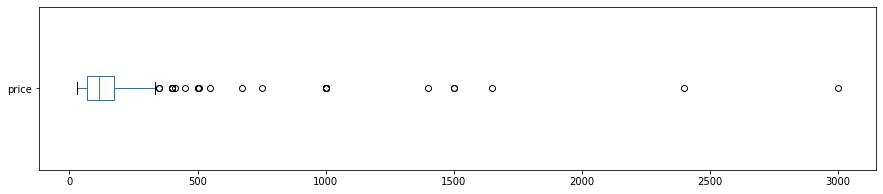

price: valores acima de 300:
29 entradas
Correspondem a 17.2619% do total


In [ ]:
# minimum_nights
salem.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 500 para price
print("price: valores acima de 300:")
print("{} entradas".format(len(salem[salem.price > 300])))
print("Correspondem a {:.4f}% do total".format((len(salem[salem.price > 300]) / salem.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente os histogramas.

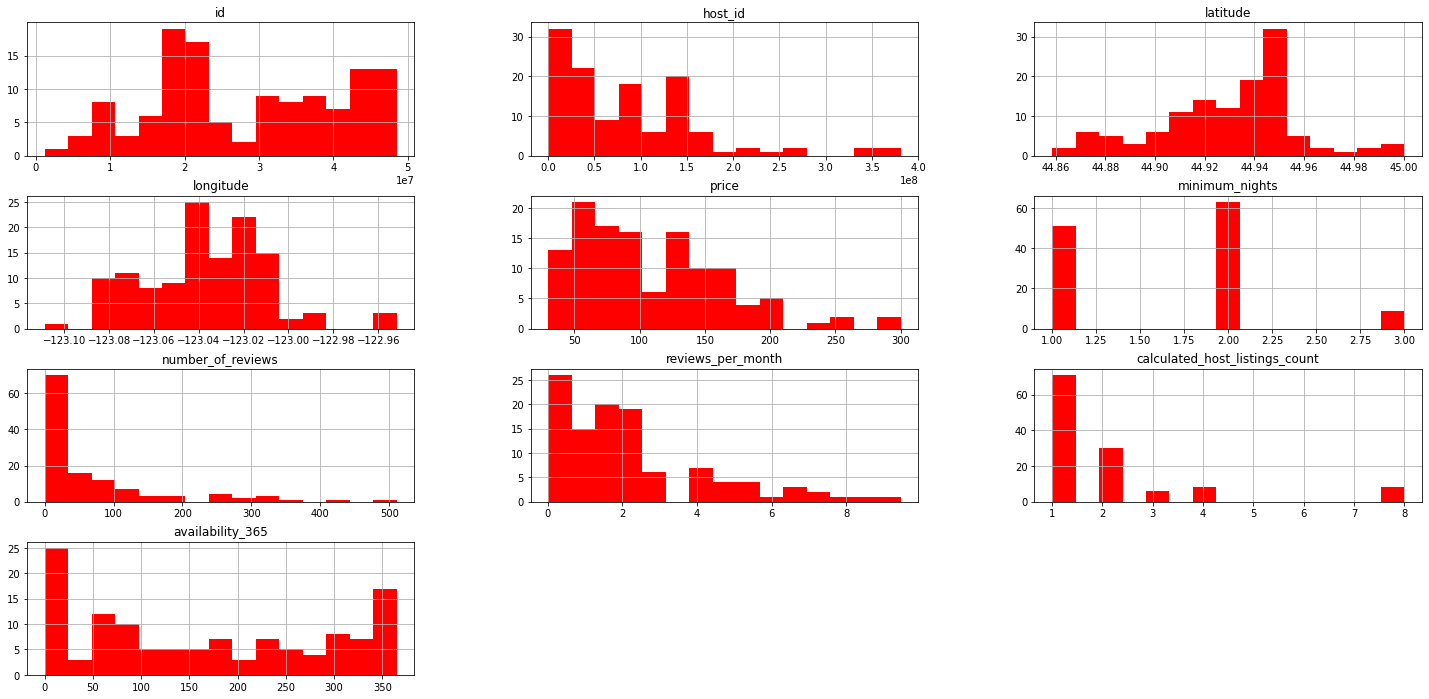

In [ ]:
# remover os *outliers* em um novo DataFrame
salem_clean = salem.copy()
salem_clean.drop(salem_clean[salem_clean.minimum_nights > 3].index, axis=0, inplace=True)
salem_clean.drop(salem_clean[salem_clean.price > 300].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
salem_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
salem_clean.hist(bins=15, color="red", figsize=(25,12));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = salem_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.033729,-0.183104,-0.129475,0.108792,0.108901
minimum_nights,0.033729,1.000000,-0.228312,-0.411202,0.042029,0.159589
number_of_reviews,-0.183104,-0.228312,1.000000,0.844804,-0.034241,-0.135169
reviews_per_month,-0.129475,-0.411202,0.844804,1.000000,-0.040289,-0.192210
calculated_host_listings_count,0.108792,0.042029,-0.034241,-0.040289,1.000000,0.325863
availability_365,0.108901,0.159589,-0.135169,-0.192210,0.325863,1.000000


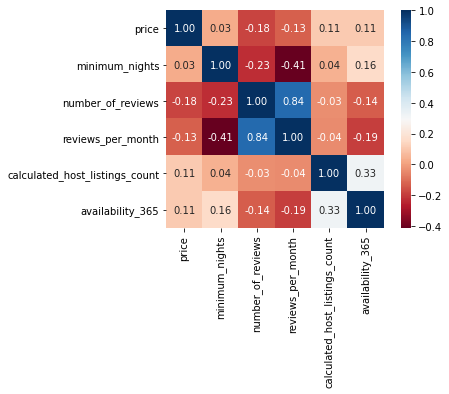

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
salem_clean.room_type.value_counts()

Entire home/apt    72
Private room       50
Shared room         1
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
salem_clean.room_type.value_counts() / salem_clean.shape[0]

Entire home/apt    0.585366
Private room       0.406504
Shared room        0.008130
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
salem_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Ward 6    154.500000
Ward 5    142.333333
Ward 8    116.769231
Ward 4    114.875000
Ward 2    112.652174
Ward 3    106.142857
Ward 1    101.853659
Ward 7     96.173913
Name: price, dtype: float64

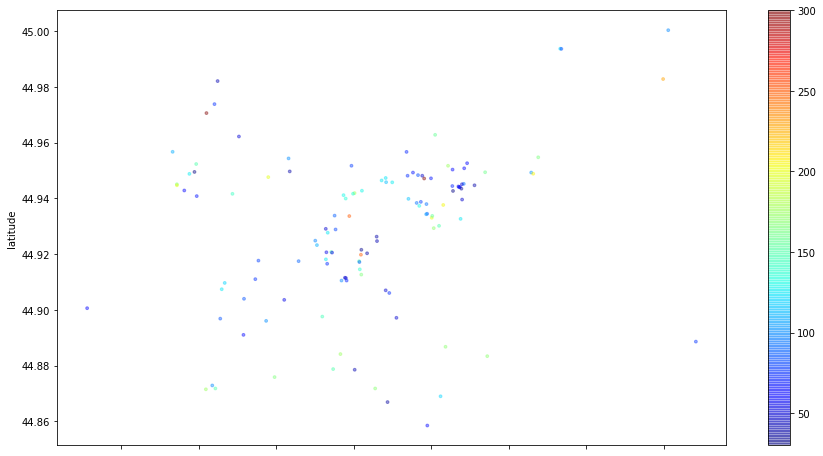

In [ ]:
# plotar os imóveis pela latitude-longitude
salem_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=salem_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A obtenção da média não é nada mais que a soma de todos valores da variável dividido pelo número de linhas do dataset.

In [ ]:
# ver a média da coluna `minimum_nights``
salem_clean.minimum_nights.sum()/salem_clean.shape[0]

1.6585365853658536

## Conclusões

Foi feita apenas uma análise exploratória básica na base de dados do Airbnb, porém já obtivemos alguns resultados como a presença de outliers, que apenas duas variáveis tem correlação significativa.


Por fim, este este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Para uma análise mais completa o ideal, em uma próxima análise exploratória, que se utilize o conjunto de dados completos, com 106 atributos disponíveis.
